In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import gamma, norm, beta, chi2, f
import matplotlib.pyplot as plt

## Центральная предельная теорема

Посчитаем mean с заданным их кол-вом, нарисуем гистограмму и построим нормальные распр-я со средним, равным а, и дисперсией, описанной через а типом изначального распр-я.

# Для $\chi^2$

In [2]:
chi2.rvs(df=2, size=10)

array([0.00896026, 0.0186625 , 1.13114474, 0.28071996, 5.29265122,
       4.86174007, 1.49250307, 0.06410804, 1.8336756 , 0.14426472])

Для распределения хи-квадрат среднее(мат ожидание) и дисперсия такие, что:
$$\mu = k$$
$$\sigma = 2k$$

На википедии более точно даётся:
$$\frac{Y - k}{\sqrt{2k}} \implies N(0, 1)$$

In [20]:
def check_chi(df, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(chi2.rvs(df, size=size))
  plt.hist(sample_mean, density=True, bins=20)
  a = chi2.mean(df)
  #a = np.mean(sample_mean)
  start = norm.ppf(0.001, loc=a, scale=np.sqrt(2*a/size))
  end = norm.ppf(0.999, loc=a, scale=np.sqrt(2*a/size))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=a, scale=np.sqrt(2*a/size))
  plt.plot(x, y, 'r', marker='.')

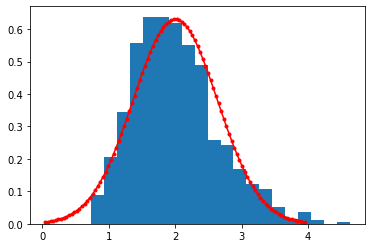

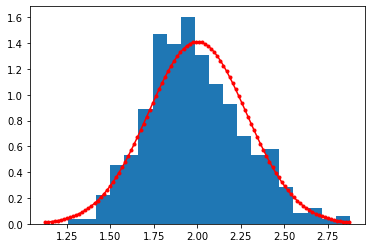

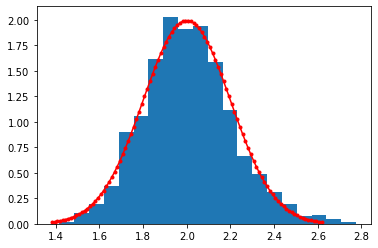

In [23]:
plt.subplots(); check_chi(2, 10)
plt.subplots(); check_chi(2, 50)
plt.subplots(); check_chi(2, 100)

С увеличением кол-ва сэмплов видим, что распределение хи-квадрат всё лучше и лучше подгоняется под нормальное распределение.

# Для Фишера

In [12]:
f.rvs(dfn=2, dfd=100, size=10)

array([0.64914227, 0.29671387, 0.51022596, 2.10498521, 1.28378125,
       0.82202861, 0.62429431, 0.00565179, 1.91000044, 0.12373467])

Для распределения Фишера среднее(мат ожидание) и дисперсия такие, что:
$$\mu = \frac{d_2}{d_2 - 2}, d_2 > 2$$
$$\sigma = \frac{2d_2^2(d_1 + d_2 - 2)}{d_1(d_2 - 2)^2(d_2 - 4)}, d_2 > 4$$

In [47]:
def check_f(dfn, dfd, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(f.rvs(dfn, dfd, size=size))
  plt.hist(sample_mean, density=True, bins = 20)
  mean_a = np.mean(sample_mean)
  #start = norm.ppf(0.001, loc=mean_a, scale=mean_a/np.sqrt(size))
  #end = norm.ppf(0.999, loc=mean_a, scale=mean_a/np.sqrt(size))
  d = (2 * dfd**2 * (dfn + dfd - 2)) / (dfn * (dfd - 2)**2 * (dfd - 4))
  start = norm.ppf(0.001, loc=mean_a, scale=np.sqrt(d / size))
  end = norm.ppf(0.999, loc=mean_a, scale=np.sqrt(d / size))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=mean_a, scale=np.sqrt(d / size))
  plt.plot(x, y, 'r', marker='.')

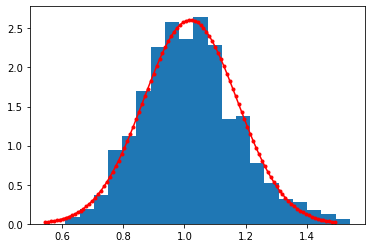

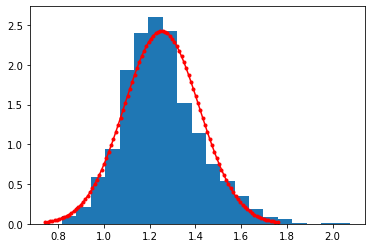

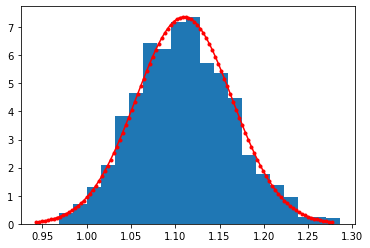

In [53]:
plt.subplots(); check_f(10, 100, 10)
plt.subplots(); check_f(5, 10, 50)
plt.subplots(); check_f(20, 20, 100)

Сейчас должно быть верно.

# В итоге

Набор средних для случайных величин можно описать нормальным распределением с определёнными аналитически средним и дисперсией. И это работает для всех распределений, которые мы разбирали.

Только вот как, например, для распр-я Коши ЦПТ применять - не ясно, оно же не имеет ни мат ожидания, ни дисперсии...

# В классе что делали

In [ ]:
norm.pdf(0, 1)

0.24197072451914337

In [ ]:
def draw_gamma(a, size):
  start = gamma.ppf(0.01, a)
  end = gamma.ppf(0.99, a)
  x = np.linspace(start, end, 100)
  sample = gamma.rvs(a=a, size=size)
  y = gamma.pdf(x, a)
  plt.plot(x, y, 'r', marker='.')
  plt.hist(sample, density=True, range=(start, end), bins=100)

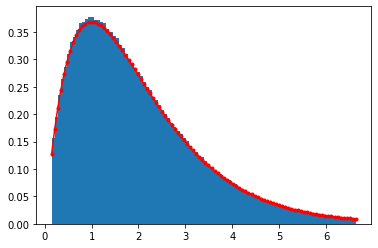

In [ ]:
draw_gamma(2, 1000000)

Почти совпадают!

In [ ]:
gamma.ppf(0.99, 2)

6.638352067993811

PPF отвечает на вопрос, в какой точке находится 99% (или заданное число) значений.

In [ ]:
gamma.ppf(0.01, 2)

0.14855474025326595

# Бутстреп

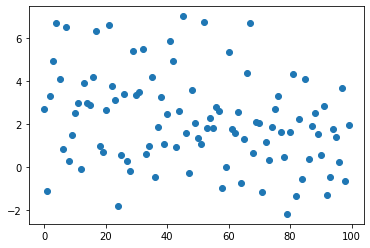

In [ ]:
sample = norm.rvs(loc=2, scale=2, size=100)
plt.plot(sample, 'o', ls='none')

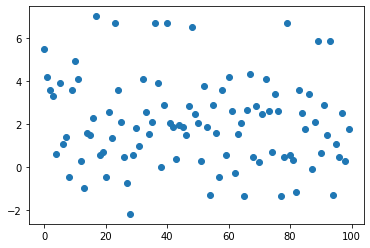

In [ ]:
pseudo_samples = [np.random.choice(sample, size=len(sample)) for i in range(1000)]
plt.plot(pseudo_samples[0], 'o', ls='none')

In [ ]:
len(pseudo_samples)

1000

In [ ]:
pseudo_means = [np.mean(p_s) for p_s in pseudo_samples]
len(pseudo_means)

1000

In [ ]:
np.percentile(pseudo_means, [0.025, 0.975])

array([1.52349227, 1.72666422])

Среднее довольно сильно отличается от выставленного нами - так сгенерились данные.

In [ ]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.mean(sample)

2.174107697105587

In [ ]:
np.std(sample)

2.1154646782135718

In [ ]:
_zconfint_generic(np.mean(sample), np.sqrt(4 / 1000), 0.05, 'two-sided')

(2.0501486906446744, 2.2980667035664992)

In [ ]:
_tconfint_generic(np.mean(sample), (np.std(sample) / np.sqrt(len(sample))), 999, 0.05, 'two-sided')

(1.7589812923434047, 2.5892341018677687)

Вот и наши среднее и стандартное отклонение попали в интервал. Заметим, что степень уверенности - разная.